In [3]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv('data/Titanic_Cleaned.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False


In [6]:
df_train = df[df['Survived'].notna()]
df_test = df[df['Survived'].isna()]
df_train.to_csv('data/train.csv', index=False)
df_test.to_csv('data/test.csv', index=False)

In [7]:
print(f"Training set shape: {df_train.shape}")
print(f"Test set shape: {df_test.shape}")

Training set shape: (891, 15)
Test set shape: (418, 15)


In [8]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [9]:
df_train['TravelAlone'] = ((df_train['SibSp'] + df_train['Parch']) == 0).astype(int)

In [10]:
df_train[['SibSp', 'Parch', 'TravelAlone']].head()

,SibSp,Parch,TravelAlone
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [11]:
df_train.drop(columns=['SibSp', 'Parch'], inplace=True)


In [12]:
df_train.head()

,PassengerId,Survived,Pclass,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique,TravelAlone
0,1,0.0,3,False,0,0,True,False,True,False,True,False,False,0
1,2,1.0,1,True,3,3,False,False,False,False,False,True,False,0
2,3,1.0,3,False,1,1,False,False,True,True,False,False,False,1
3,4,1.0,1,True,2,3,False,False,True,False,False,True,False,0
4,5,0.0,3,False,2,1,True,False,True,False,True,False,False,1


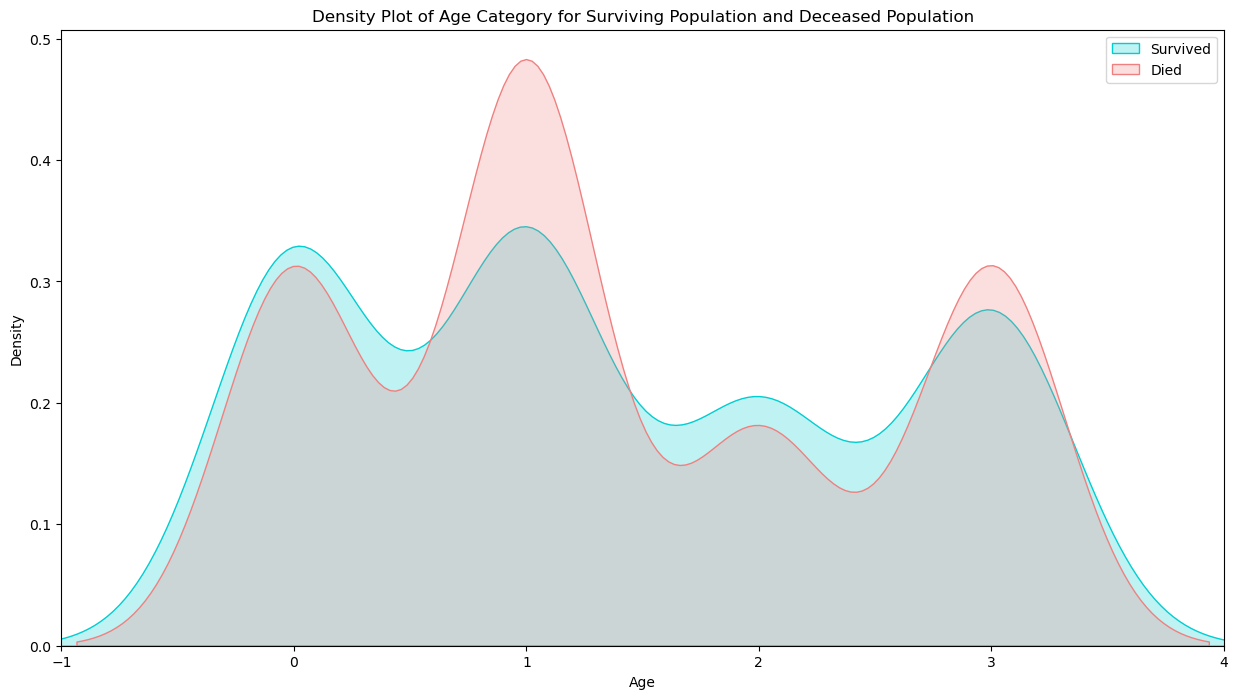

In [13]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatAge"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatAge"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age Category for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-1,4)
plt.show()


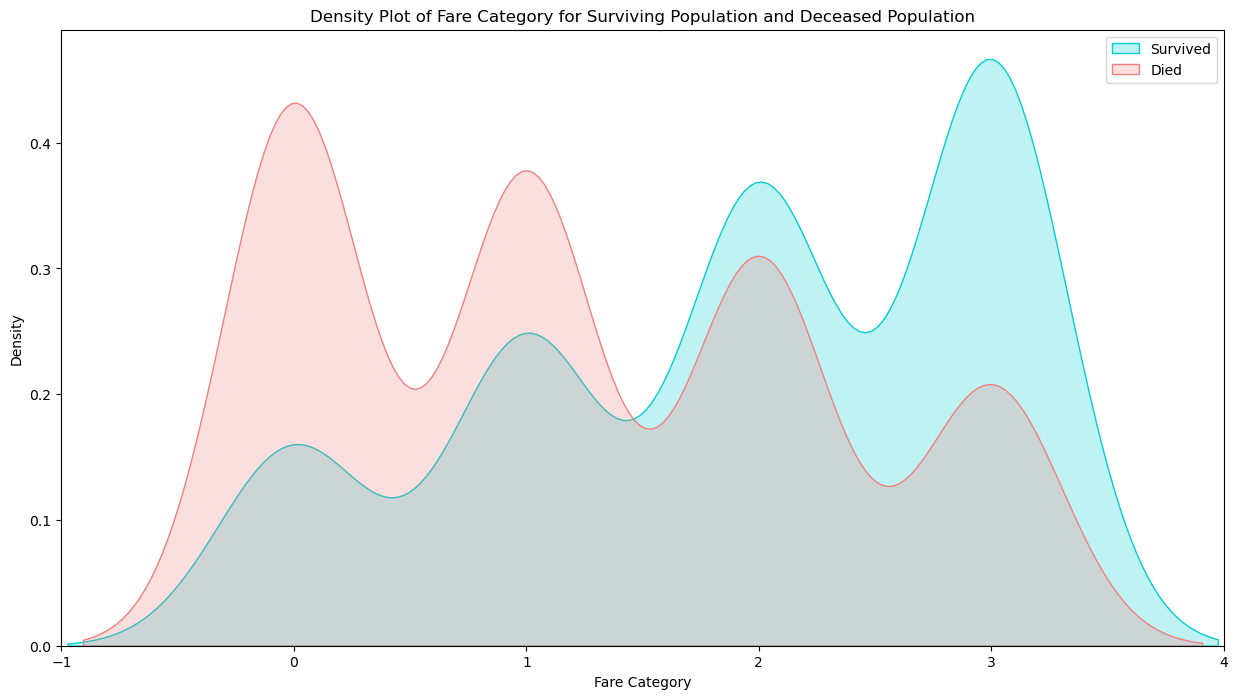

In [14]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatFare"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatFare"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare Category for Surviving Population and Deceased Population')
ax.set(xlabel='Fare Category')
plt.xlim(-1,4)
plt.show()

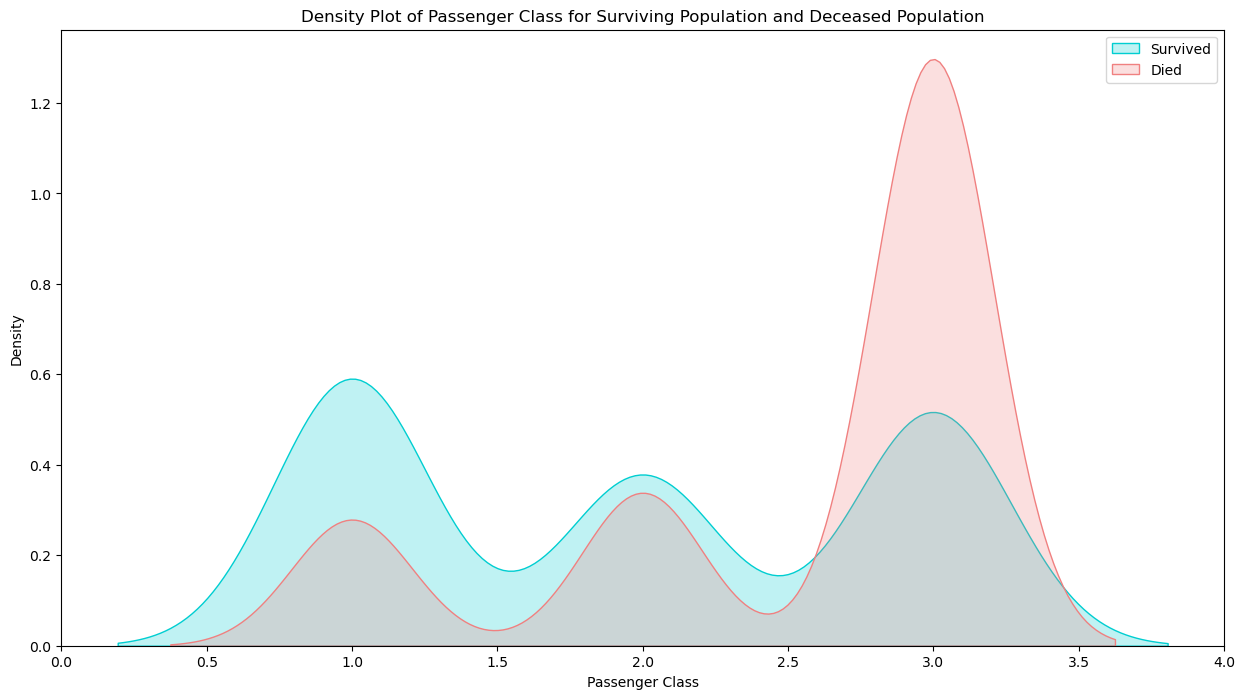

In [15]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Pclass"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Pclass"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Passenger Class for Surviving Population and Deceased Population')
ax.set(xlabel='Passenger Class')
plt.xlim(0,4)
plt.show()

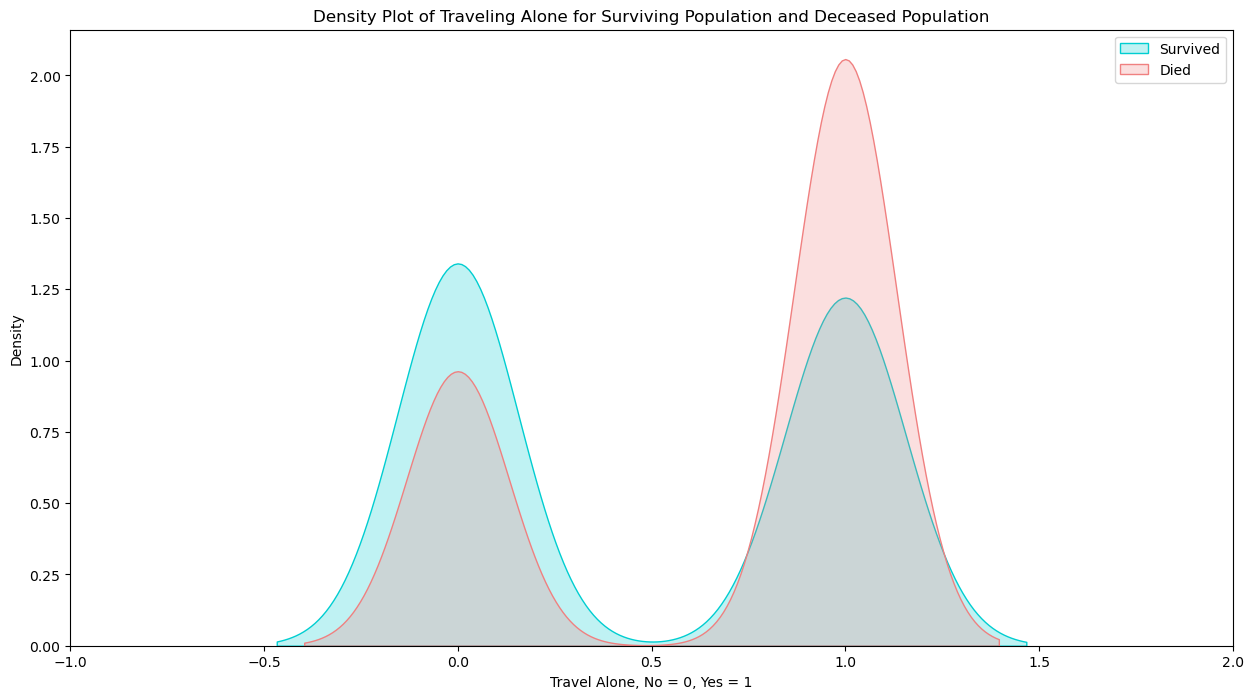

In [16]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Traveling Alone for Surviving Population and Deceased Population')
ax.set(xlabel='Travel Alone, No = 0, Yes = 1')
plt.xlim(-1,2)
plt.show()

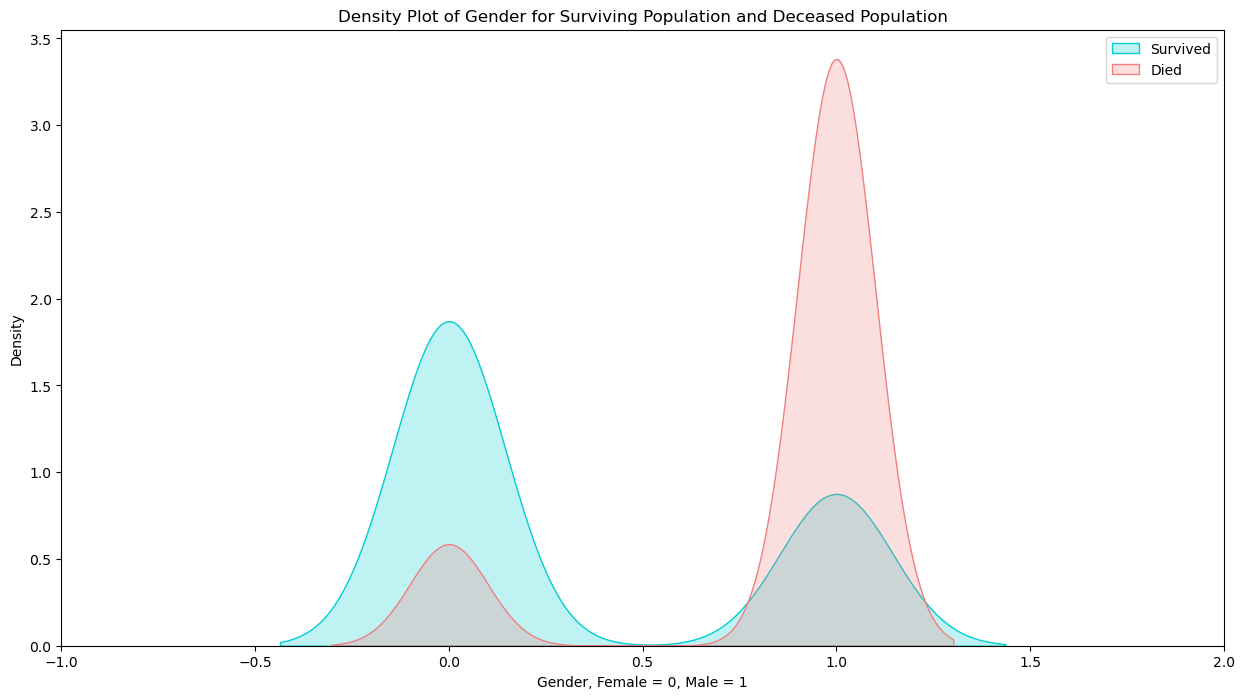

In [17]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Sex_male"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Sex_male"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Gender for Surviving Population and Deceased Population')
ax.set(xlabel='Gender, Female = 0, Male = 1')
plt.xlim(-1,2)
plt.show()

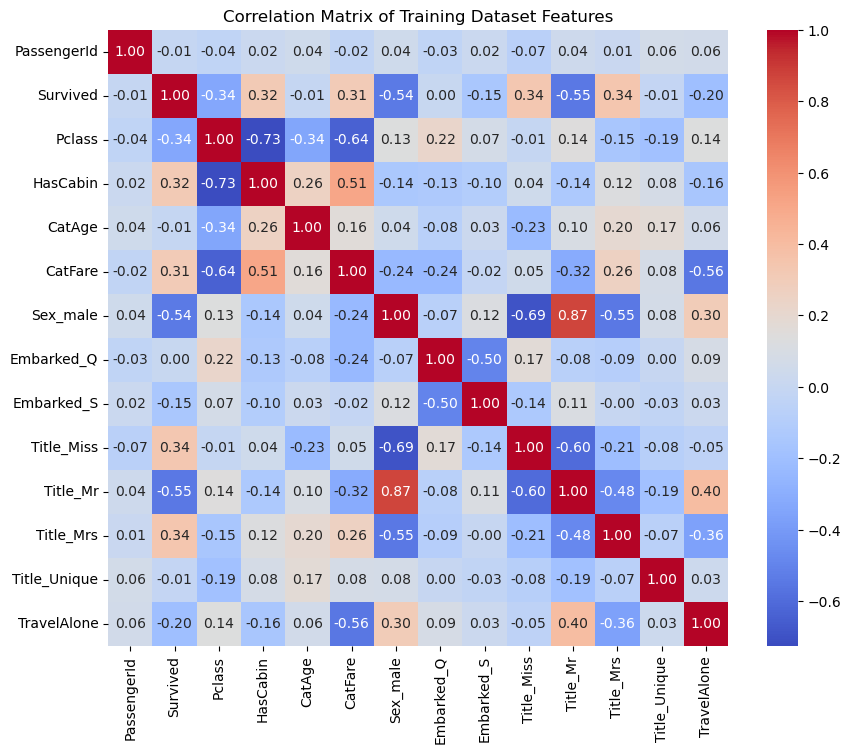

In [18]:
# Compute correlation matrix
correlation_matrix = df_train.corr()

#Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Training Dataset Features')
plt.show()

1. Passenger class, Has cabin, Fare and gender are the most strongly correlated features with survival.

2. Pclass and HasCabin are highly correlated with each other. Pclass is also correlated with Fare. TravelAlone is correlated with Fare. 

In [19]:
# 1. Prepare the data
X = df_train.drop(['PassengerId', 'Survived'], axis=1)
y = df_train['Survived']

# If there are categorical variables, make sure to encode them appropriately
# For example:
# X = pd.get_dummies(X, drop_first=True)

# 2. Initialize the model
model = LogisticRegression(max_iter=1000)

# 3. Perform RFE
rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X, y)

# 4. List the selected features
selected_features = X.columns[rfe.support_]
print('Selected features:', selected_features)

Selected features: Index(['Pclass', 'HasCabin', 'Sex_male', 'Embarked_S', 'Title_Miss',
       'Title_Mr', 'Title_Unique', 'TravelAlone'],
      dtype='object')


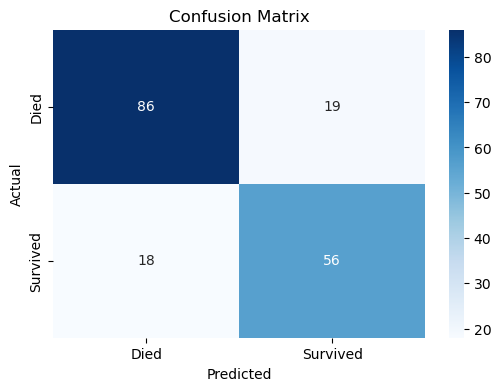

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       105
         1.0       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 1. Split the data
X = df_train[selected_features]
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 3. Make predictions
y_pred = model.predict(X_test)

# 4. Evaluate the model
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.79


Accuracy tells us how often the model is correct. Works well when the target variable is balanced. However, it is not the best metric when the target variable is imbalanced.

In [22]:
from sklearn.metrics import log_loss

# Predict probabilities instead of labels (0 or 1)
y_pred_proba = model.predict_proba(X_test)

# Calculate log loss using true labels and predicted probabilities
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss:.4f}")


Log Loss: 0.4335


Log loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value. Log loss penalizes false classifications with higher confidence more than false classifications with lower confidence.

In [23]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")


AUC: 0.8707


AUC tells you how well the model distinguishes between the positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

### Summary

Accuracy tells you how often your model is correct, but it may not be reliable in the presence of class imbalance.

Log Loss gives more detailed insight into how well the predicted probabilities align with actual outcomes, penalizing overconfident wrong predictions more heavily.

AUC is useful for understanding how well your model separates the positive and negative classes across all threshold settings, making it effective for imbalanced datasets.

2. Trade-off between precision and recall

If you want to increase precision, you need to be more certain before predicting a positive. This results in predicting fewer positives, which means you might miss some actual positives (lower recall).

If you want to increase recall, you need to predict more positives. This will increase true positives, but it will also increase false positives, which decreases precision.

Prioritize Precision when false positives are costly (e.g., in email spam filters, where you don’t want to wrongly classify important emails as spam).

Prioritize Recall when missing positive instances is costly (e.g., in disease diagnosis, where missing a true case of a disease could have serious consequences).

In [24]:
from sklearn.model_selection import cross_val_score

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Accuracy
scores_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(f'Average Accuracy: {scores_accuracy.mean():.2f}')

# Log Loss
scores_log_loss = cross_val_score(model, X, y, cv=10, scoring='neg_log_loss')
print(f'Average Log Loss: {-scores_log_loss.mean():.2f}')

# AUC
scores_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print(f'Average AUC: {scores_auc.mean():.2f}')

Average Accuracy: 0.81
Average Log Loss: 0.44
Average AUC: 0.86


1. Cross-validation provides similar results to my initial evaluation. The model is consistent and generalizes well.

2. Cross-validation is important because it provides a more accurate measure of model performance than a single train-test split. It helps to ensure that the model is not overfitting to the training data.